In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

os.chdir('../data/TewheyMPRA')

In [2]:
df_1 = pd.read_csv('TewheyMPRA_GM12878.csv')
df_1

,ID,chr,pos,allele,seq,log2FoldChange,log2FoldChangeOverControl
0,1:881627:G:A:A:wC,chr1,881627,alt,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,-0.082,-0.047
1,1:881627:G:A:R:wC,chr1,881627,ref,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,0.249,0.083
2,1:891059:C:T:A:wC,chr1,891059,alt,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.830,0.310
3,1:891059:C:T:R:wC,chr1,891059,ref,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.956,0.360
4,1:891945:A:G:A:wC,chr1,891945,alt,CCTCCAGGTGGTATCTGGAGCTCTCCGTATCCTTGTCCCTGGAAAA...,-0.151,-0.074
...,...,...,...,...,...,...,...
286333,9:140374146:G:A:R:wC,chr9,140374146,ref,AGAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTG...,0.202,0.117
286334,9:140374147:C:A:A:wC,chr9,140374147,alt,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.342,0.199
286335,9:140374147:C:A:R:wC,chr9,140374147,ref,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,-0.128,-0.076
286336,9:140530127:T:C:A:wC,chr9,140530127,alt,TTTGGGAGGCCGAGGTGGGTGGATCACGAGGTCAGGAGATCGAGAC...,0.740,0.350


In [3]:
df_2 = pd.read_csv('TewheyMPRA_A549.csv')
df_2

,ID,chr,pos,allele,seq,log2FoldChange,log2FoldChangeOverControl
0,1:881627:G:A:A:wC,chr1,881627,alt,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,-0.159,-0.071
1,1:881627:G:A:R:wC,chr1,881627,ref,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,0.174,0.023
2,1:891059:C:T:A:wC,chr1,891059,alt,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.979,0.250
3,1:891059:C:T:R:wC,chr1,891059,ref,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,1.404,0.371
4,1:891945:A:G:A:wC,chr1,891945,alt,CCTCCAGGTGGTATCTGGAGCTCTCCGTATCCTTGTCCCTGGAAAA...,0.501,0.115
...,...,...,...,...,...,...,...
286333,9:140374146:G:A:R:wC,chr9,140374146,ref,AGAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTG...,1.073,0.292
286334,9:140374147:C:A:A:wC,chr9,140374147,alt,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.446,0.098
286335,9:140374147:C:A:R:wC,chr9,140374147,ref,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.814,0.212
286336,9:140530127:T:C:A:wC,chr9,140530127,alt,TTTGGGAGGCCGAGGTGGGTGGATCACGAGGTCAGGAGATCGAGAC...,1.014,0.307


In [4]:
(df_1['pos'] == df_2['pos']).all()

True

In [5]:
df = df_1.copy()
df['GM12878_x'] = df_1['log2FoldChange']
df['GM12878_over_control'] = df_1['log2FoldChangeOverControl']

df['A549_x'] = df_2['log2FoldChange']
df['A549_over_control'] = df_2['log2FoldChangeOverControl']

0.9883222013449442


<Axes: >

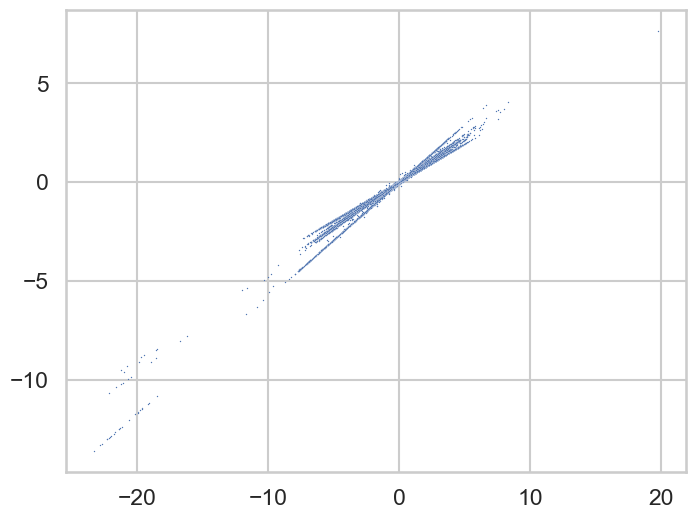

In [6]:
x = np.array(df['GM12878_x'])
y = np.array(df['GM12878_over_control'])

r, _ = pearson(x, y)
print(r)

sns.scatterplot(x=x, y=y, s=1)

0.46904313462674985


<Axes: >

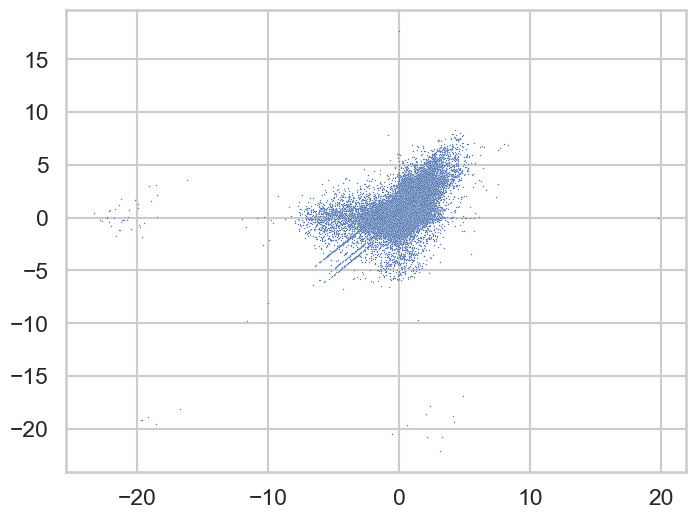

In [7]:
x = np.array(df['GM12878_x'])
y = np.array(df['A549_x'])

r, _ = pearson(x, y)
print(r)

sns.scatterplot(x=x, y=y, s=1)

0.44179652721953055


<Axes: >

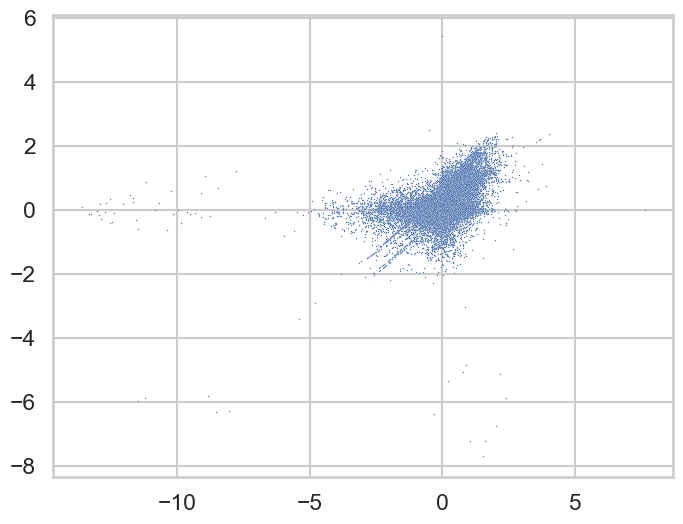

In [8]:
x = np.array(df['GM12878_over_control'])
y = np.array(df['A549_over_control'])

r, _ = pearson(x, y)
print(r)

sns.scatterplot(x=x, y=y, s=1)

In [9]:
SirajMPRA_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/MPRA_predict/data/SirajMPRA/SirajMPRA_562654.csv')
SirajMPRA_df['allele'] = np.where(SirajMPRA_df['is_ref'], 'ref', 'alt')
SirajMPRA_df

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt,start,end,585605_index,allele
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.668,-0.704,0.539,0.159,True,chr1,14677,G,A,14577,14777,0,ref
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.416,0.554,0.442,-0.288,False,chr1,14677,G,A,14577,14777,1,alt
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.270,-0.391,0.752,1.100,True,chr1,63697,T,C,63597,63797,2,ref
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.152,-0.659,0.205,1.051,False,chr1,63697,T,C,63597,63797,3,alt
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211,-0.007,0.499,0.258,True,chr1,64764,C,T,64664,64864,4,ref
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.616,1.927,0.798,1.035,False,chrX,155233098,T,C,155232998,155233198,585600,alt
562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.410,0.556,2.843,1.496,True,chrX,155233794,A,G,155233694,155233894,585601,ref
562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.895,-0.073,1.974,0.795,False,chrX,155233794,A,G,155233694,155233894,585602,alt
562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312,0.166,-0.041,0.444,True,chrX,155234730,T,C,155234630,155234830,585603,ref


In [10]:
(~SirajMPRA_df['A549'].isna()).sum()

228902

In [11]:
merged_df = pd.merge(df, SirajMPRA_df, on=['chr', 'pos', 'allele'], how='inner')
merged_df

,ID,chr,pos,allele,seq_x,log2FoldChange,log2FoldChangeOverControl,GM12878_x,GM12878_over_control,A549_x,A549_over_control,description,seq_y,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,ref,alt,start,end,585605_index
0,1:881627:G:A:A:wC,chr1,881627,alt,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,-0.082,-0.047,-0.082,-0.047,-0.159,-0.071,chr1:881627:G:A,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,-0.159,0.408,-0.039,-0.200,NaN,False,G,A,881527,881727,144
1,1:881627:G:A:R:wC,chr1,881627,ref,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,0.249,0.083,0.249,0.083,0.174,0.023,chr1:881627:G:A,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,0.174,0.923,0.510,0.195,NaN,True,G,A,881527,881727,143
2,1:891059:C:T:A:wC,chr1,891059,alt,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.830,0.310,0.830,0.310,0.979,0.250,chr1:891059:C:T,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.979,1.503,3.705,2.436,NaN,False,C,T,890959,891159,159
3,1:891059:C:T:R:wC,chr1,891059,ref,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,0.956,0.360,0.956,0.360,1.404,0.371,chr1:891059:C:T,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,1.404,1.572,4.083,2.670,NaN,True,C,T,890959,891159,158
4,1:891945:A:G:A:wC,chr1,891945,alt,CCTCCAGGTGGTATCTGGAGCTCTCCGTATCCTTGTCCCTGGAAAA...,-0.151,-0.074,-0.151,-0.074,0.501,0.115,chr1:891945:A:G,CCTCCAGGTGGTATCTGGAGCTCTCCGTATCCTTGTCCCTGGAAAA...,0.501,1.837,1.528,0.406,NaN,False,A,G,891845,892045,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232126,9:140374146:G:A:R:wC,chr9,140374146,ref,AGAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTG...,0.202,0.117,0.202,0.117,1.073,0.292,chr9:140374146:G:A,AGAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTG...,1.073,1.807,0.936,2.703,NaN,True,G,A,140374046,140374246,578045
232127,9:140374147:C:A:A:wC,chr9,140374147,alt,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.342,0.199,0.342,0.199,0.446,0.098,chr9:140374147:C:A,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.446,0.938,0.216,1.724,NaN,False,C,A,140374047,140374247,578048
232128,9:140374147:C:A:R:wC,chr9,140374147,ref,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,-0.128,-0.076,-0.128,-0.076,0.814,0.212,chr9:140374147:C:A,GAGGAGGAATTTTTAGCTGCCCCAGGATTAGCCCAGGCAGGCTTGT...,0.814,1.827,0.681,2.538,NaN,True,C,A,140374047,140374247,578047
232129,9:140530127:T:C:A:wC,chr9,140530127,alt,TTTGGGAGGCCGAGGTGGGTGGATCACGAGGTCAGGAGATCGAGAC...,0.740,0.350,0.740,0.350,1.014,0.307,chr9:140530127:T:C,TTTGGGAGGCCGAGGTGGGTGGATCACGAGGTCAGGAGATCGAGAC...,1.014,1.036,0.588,1.294,NaN,False,T,C,140530027,140530227,578132


In [13]:
(~merged_df['A549'].isna()).sum()

228902

0.9922918636250526


<Axes: >

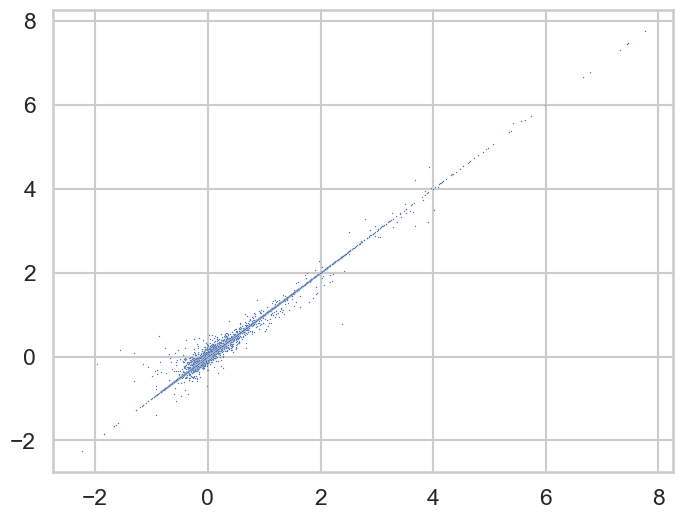

In [15]:
x = np.array(merged_df['A549_x'])
y = np.array(merged_df['A549'])

r, _ = pearson(x, y)
print(r)

sns.scatterplot(x=x[:10000], y=y[:10000], s=1)

0.9878221075123166


<Axes: >

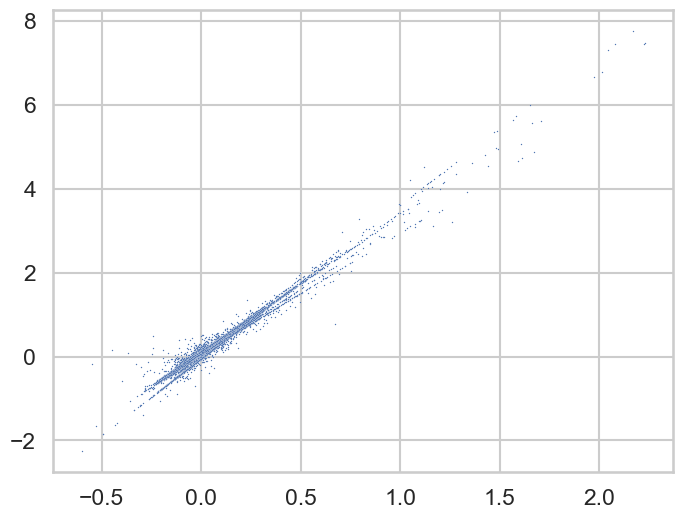

In [17]:
x = np.array(merged_df['A549_over_control'])
y = np.array(merged_df['A549'])

r, _ = pearson(x, y)
print(r)

sns.scatterplot(x=x[:10000], y=y[:10000], s=1)

In [19]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'A549', 'HCT116']
for cell_type in cell_types:
    x = np.array(merged_df['GM12878_x'])
    y = np.array(merged_df[cell_type])
    r, _ = pearson(x, y)
    print(r)


0.454090217167337
0.48418960790897764
0.4877870286326439
0.5955622879383244
0.5033018104075209


In [20]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'A549', 'HCT116']
for cell_type in cell_types:
    x = np.array(merged_df['K562'])
    y = np.array(merged_df[cell_type])
    r, _ = pearson(x, y)
    print(r)

0.7731423256163322
1.0
0.710016757662227
0.7274824567146494
0.8180190686302766
